## ΕΡΓΑΣΙΑ 2  -  ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ

**ΜΑΡΑΝΤΙΔΗΣ ΘΕΟΦΑΝΗΣ** - sdi1800106


**ΚΟΥΚΟΥΛΑΡΗΣ ΕΜΜΑΝΟΥΗΛ** - sdi1700262

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

import gensim
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Χρησιμοπoείται για inline plotting
%matplotlib inline 

Mounted at /content/drive
     |████████████████████████████████| 23.9MB 167kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Loading data and Clearing the dataset

In [2]:
# load the csv files
true_df = pd.read_csv('/content/drive/MyDrive/hw2_data/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/hw2_data/Fake.csv')


percentage = 1
size_per_df = int(percentage * true_df.shape[0])

true_df = true_df.head(size_per_df)
fake_df = fake_df.head(size_per_df)

df = pd.concat([true_df, fake_df])

# we are clearing the info we have from unwanted special characters 
import re



def prepare_df(df):
    for field in ['title', 'text']:
        df[field] = df[field].str.lower()
        df[field] = df[field].str.replace(",", "")
        df[field] = df[field].str.replace("-", " ")
        df[field] = df[field].str.replace(")", "")
        df[field] = df[field].str.replace("(", "")
        df[field] = df[field].str.replace("'", "")

# we prepare the dataframes based on the above funcs
prepare_df(true_df)
prepare_df(fake_df)
prepare_df(df)

true_df


,title,text,subject,date
0,as u.s. budget fight looms republicans flip th...,washington reuters the head of a conservativ...,politicsNews,"December 31, 2017"
1,u.s. military to accept transgender recruits o...,washington reuters transgender people will b...,politicsNews,"December 29, 2017"
2,senior u.s. republican senator: let mr. muelle...,washington reuters the special counsel inves...,politicsNews,"December 31, 2017"
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ge...,politicsNews,"December 30, 2017"
4,trump wants postal service to charge much more...,seattle/washington reuters president donald ...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,fully committed nato backs new u.s. approach o...,brussels reuters nato allies on tuesday welc...,worldnews,"August 22, 2017"
21413,lexisnexis withdrew two products from chinese ...,london reuters lexisnexis a provider of lega...,worldnews,"August 22, 2017"
21414,minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused sovie...,worldnews,"August 22, 2017"
21415,vatican upbeat on possibility of pope francis ...,moscow reuters vatican secretary of state ca...,worldnews,"August 22, 2017"


# 2.α 
***Ο τίτλος καθορίζει αρκετά το περιεχόμενο ενός άρθρου. Προσπαθήστε να
οπτικοποιήστε τους τίτλους των fake και των non-fake news έτσι ώστε να μπορεί
κάποιος να εντοπίσει τα κεντρικά θέματα τα οποία διαπραγματεύονται τα άρθρα***


Οπτικοποιουμε με την wordcloud τοσο τα θεματα των true οσο και των fake news ετσι ωστε να μπορουμε να διαχωρισουμε λεξεις κλειδια που προσδιοριζουν τον τυπο του νεο εαν δηλαδη υπαρχει πιθανοτητα να αποτελει true ή fake news.

WORDCLOUD TRUE TITLES


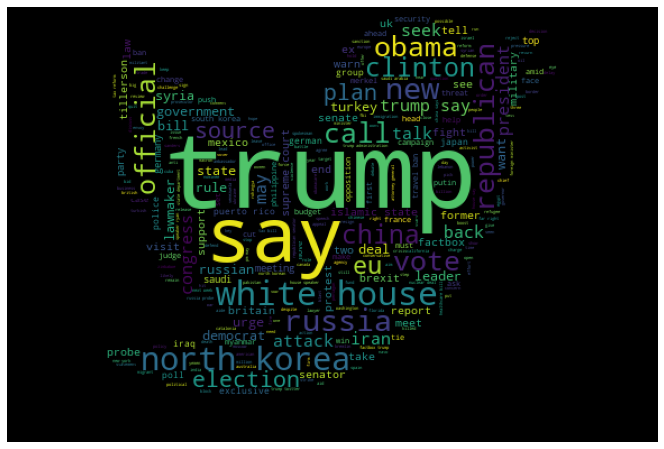

WORDCLOUD FAKE TITLES


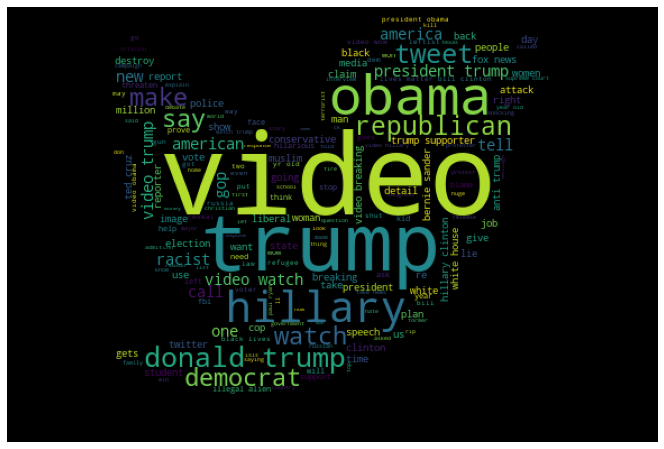

In [3]:

# we try to save all titles in a sigle list 
titles_only_list_true = true_df['title'].to_list()
titles_only_list_fake = fake_df['title'].to_list()
titles_concatenated_true = " ".join(titles_only_list_true).lower()
titles_concatenated_fake = " ".join(titles_only_list_fake).lower()


wordlist_true = titles_concatenated_true.split(' ')
en_stops = set(stopwords.words('english'))
# remove the english stopwords from titles

for w in wordlist_true:
    if w in en_stops:
        wordlist_true.remove(w)

titles_concatenated_true = " ".join(wordlist_true)



wordlist_fake = titles_concatenated_fake.split(' ')
en_stops = set(stopwords.words('english'))
# remove the english stopwords from titles

for w in wordlist_fake:
    if w in en_stops:
        wordlist_fake.remove(w)

titles_concatenated_fake = " ".join(wordlist_fake)

# create a wordcloud for the titles list created above
def wordcloud_print(data):
    mask = np.array(Image.open(requests.get('https://images.techhive.com/images/article/2016/02/twitter-icon-logo-100644740-large.jpg', stream=True).raw))
    wordcloud = WordCloud(max_font_size=600, max_words=600, background_color="black", mask=mask).generate(str(data))
    plt.figure(figsize=(20,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("WORDCLOUD TRUE TITLES")
wordcloud_print(titles_concatenated_true)
print("WORDCLOUD FAKE TITLES")
wordcloud_print(titles_concatenated_fake)


# 2β.
***Σχεδιάστε γραφήματα που να δείχνουν το μέσο όρο των χαρακτήρων στα fake και στα true news αντίστοιχα. Κάντε το ίδιο και για τη στήλη text.***

We implement scatter plot 
which demonstrates the len for each title in dataset.
The region where it has the most dots gathered is the most frequent 
len in titles/text

Text(0.5, 1.0, 'Mean Characters in Text')

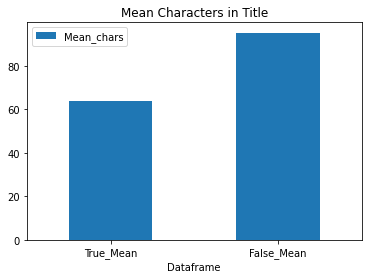

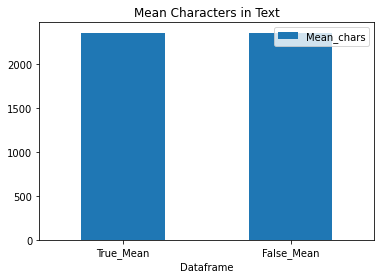

In [4]:
import statistics


# for true df
true_with_len = pd.DataFrame(true_df)
true_with_len['len'] = true_with_len['title'].str.len()
fake_with_len = pd.DataFrame(fake_df)
fake_with_len['len'] = fake_with_len['title'].str.len()
# plt.scatter( x=range(true_with_len.shape[0]),y=true_with_len['len'], color = "#A5243D", s = 3)
# plt.ylabel('length')
# plt.title("True DF Title length frequency")
# plt.show()

# true df
mylist = true_with_len['len'].values.tolist()
average_true = statistics.mean(mylist)

# fake df
mylist.clear()
mylist = fake_with_len['len'].values.tolist()
average_false = statistics.mean(mylist)


df = pd.DataFrame({'Dataframe':['True_Mean','False_Mean'], 'Mean_chars':[average_true,average_false]})
df.plot.bar(x='Dataframe', y='Mean_chars', rot=0)
plt.title("Mean Characters in Title")
# # for fake df
# fake_with_len = pd.DataFrame(fake_df)
# fake_with_len['len'] = fake_with_len['title'].str.len()
# plt.scatter( x=range(fake_with_len.shape[0]),y=fake_with_len['len'],color = '#FE5E41', s = 3)
# plt.title("Fake DF Title length freq")
# plt.ylabel('length')
# plt.show()

# -----------------------------
# same for the text 


mylist.clear()
true_with_len = pd.DataFrame(true_df)
true_with_len['len'] = true_with_len['text'].str.len()
mylist = true_with_len['len'].values.tolist()
average_true = statistics.mean(mylist)

mylist.clear()
fake_with_len = pd.DataFrame(fake_df)
fake_with_len['len'] = fake_with_len['text'].str.len()
mylist = fake_with_len['len'].values.tolist()
average_false = statistics.mean(mylist)



df = pd.DataFrame({'Dataframe':['True_Mean','False_Mean'], 'Mean_chars':[average_true,average_false]})
df.plot.bar(x='Dataframe', y='Mean_chars', rot=0)
plt.title("Mean Characters in Text")





# 2γ. 
***Σχεδιάστε την κατανομή του αριθμού των λέξεων για τη στήλη title και για τη στήλη text (και για τα δύο αρχεία)***


Στο συγκεκριμενο ερωτημα σχεδιαζουμε με την βοηθεια της plot.kde()
την κατανομη βαση τoυ len() για τοσο για τους τιτλους οσο και για την περιγραφη(text).

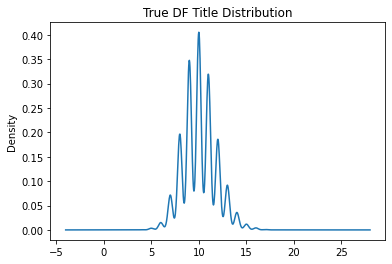

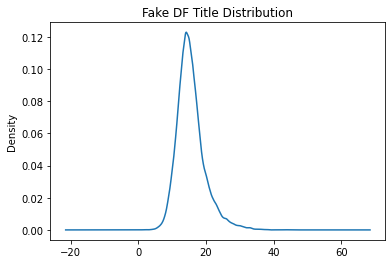

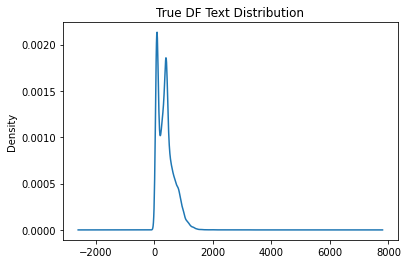

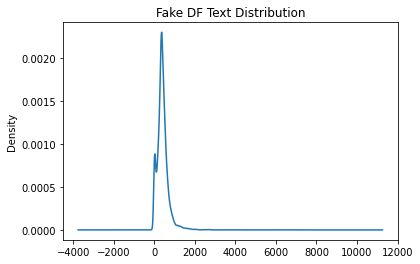

9731     7508
17849    7508
12406    7059
19621    7059
13360    5524
         ... 
11695       1
11517       1
11513       1
12049       1
12255       1
Name: len, Length: 21417, dtype: int64

In [5]:

# we plot the distribution for true/fake title len 
true_with_len = pd.DataFrame(true_df)

true_with_len['len'] = true_with_len['title'].str.split(" ").str.len()
true_with_len['len'].plot.kde()
plt.title("True DF Title Distribution")
plt.show()

fake_with_len = fake_df.copy(deep=True)
fake_with_len['len'] = fake_with_len['title'].str.split(" ").str.len()
fake_with_len['len'].plot.kde()
plt.title("Fake DF Title Distribution")
plt.show()


# we plot the distribution for true/fake text len 
true_with_len = pd.DataFrame(true_df)

true_with_len['len'] = true_with_len['text'].str.split(" ").str.len()
true_with_len['len'].plot.kde()
plt.title("True DF Text Distribution")
plt.show()

fake_with_len = fake_df.copy(deep=True)
fake_with_len['len'] = fake_with_len['text'].str.split(" ").str.len()
fake_with_len['len'].plot.kde()
plt.title("Fake DF Text Distribution")
plt.show()

# fake_with_len['len'].plot.bar();

fake_with_len['len'].sort_values(ascending=False)



# 2δ. 
***Επαναλλάβετε το προηγούμενο ερώτημα αφαιρώντας τα stopwords.***

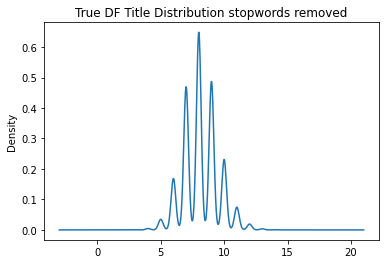

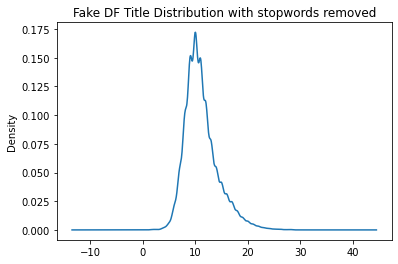

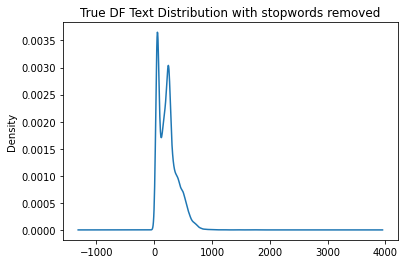

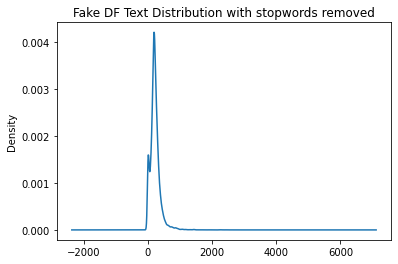

In [6]:
# 2.d

# we do the same as in 2c but now we remoce stopwords


# title
true_with_len = true_df.copy(deep=True)
stop = stopwords.words('english')
true_with_len['title'] = true_with_len['title'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
true_with_len['len'] = true_with_len['title'].str.split(" ").str.len()
true_with_len['len'].plot.kde()
plt.title("True DF Title Distribution stopwords removed")
plt.show()


fake_with_len = fake_df.copy(deep=True)
stop = stopwords.words('english')
fake_with_len['title'] = fake_with_len['title'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
fake_with_len['len'] = fake_with_len['title'].str.split(" ").str.len()
fake_with_len['len'].plot.kde()
plt.title("Fake DF Title Distribution with stopwords removed")
plt.show()



# text
true_with_len = true_df.copy(deep=True)
stop = stopwords.words('english')
true_with_len['text'] = true_with_len['text'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
true_with_len['len'] = true_with_len['text'].str.split(" ").str.len()
true_with_len['len'].plot.kde()
plt.title("True DF Text Distribution with stopwords removed")
plt.show()


fake_with_len = fake_df.copy(deep=True)
stop = stopwords.words('english')
fake_with_len['text'] = fake_with_len['text'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
fake_with_len['len'] = fake_with_len['text'].str.split(" ").str.len()
fake_with_len['len'].plot.kde()
plt.title("Fake DF Text Distribution with stopwords removed")
plt.show()

# 2ε.
***Τα πιο συχνά 20 bigrams στους τίτλους και στο κυρίως
άρθρο***

Χρησιμοποιώντας την count vectorizer δημιουργούμε ένα dataframe και ενα array για την αναπαρασταση των bigrams.
Στην συνεχεια με την βοηθεια της plot κανουμε την γραφικη αναπαρασταση των 20 πιο συχνων bigrams τοσο στους τιτλους οσο και στο κυριως αρθρο.


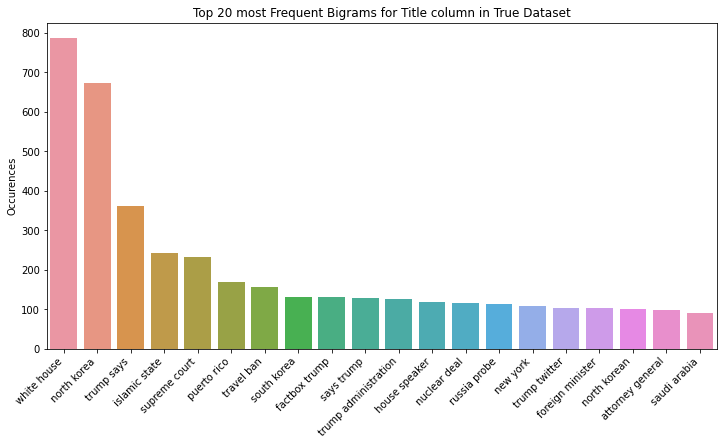

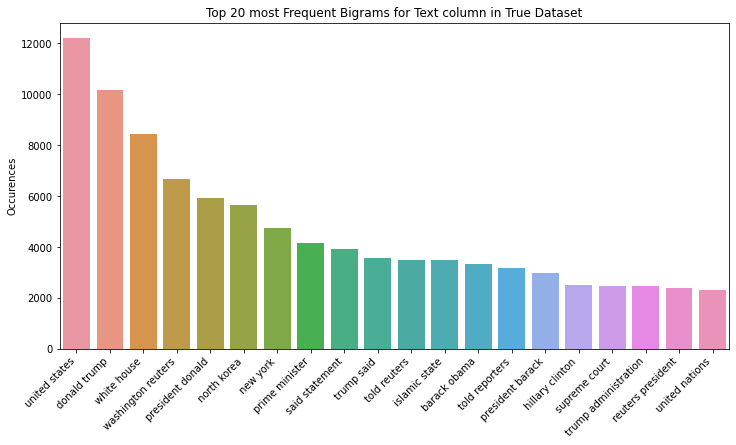

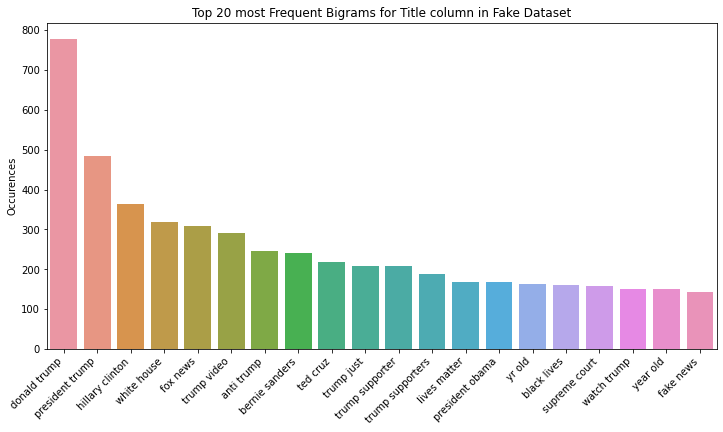

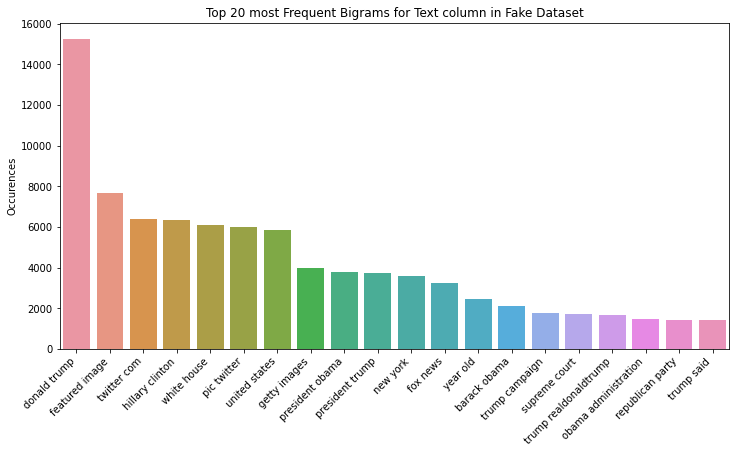

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
# same functions as in the 1st exercise 
# we create bigram df and bigram array for the description list we provide
def count_vectorizer_bigrams(desclist, i):
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features= 1000)  
    x = vectorizer.fit_transform(desclist)

    tokens = vectorizer.get_feature_names()
    bigram = pd.DataFrame(data = x.toarray(), index = i, columns = tokens)
    return bigram, x.toarray()




bigram, bi_arr = count_vectorizer_bigrams(true_df['title'].to_list(), range(0, true_df.shape[0]))


# we sum the number of occurences for each bigram in a dictionary so we can 
# extract the most frequent

mydict = dict()
for col in bigram.columns:
    mydict[col] = bigram[col].sum()

sums_df = pd.DataFrame.from_dict(mydict, orient='index').sort_values([0], ascending=False)
sums_df.head(20)


# plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax = sns.barplot(data =sums_df.head(20).reset_index(), x = "index", y =0)
ax = ax.set(xlabel='', ylabel='Occurences')
plt.title("Top 20 most Frequent Bigrams for Title column in True Dataset")
plt.show()


# we do the same for text column 
bigram, bi_arr = count_vectorizer_bigrams(true_df['text'].to_list(), range(0, true_df.shape[0]))

mydict = dict()
for col in bigram.columns:
    mydict[col] = bigram[col].sum()

sums_df = pd.DataFrame.from_dict(mydict, orient='index').sort_values([0], ascending=False)
sums_df.head(20)


# plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax = sns.barplot(data =sums_df.head(20).reset_index(), x = "index", y =0)
ax = ax.set(xlabel='', ylabel='Occurences')
plt.title("Top 20 most Frequent Bigrams for Text column in True Dataset")
plt.show()

# ------------------------------------------------------------------------------------------------------------
# same for fake dataset

bigramfk, bi_arr_fk = count_vectorizer_bigrams(fake_df['title'].to_list(), range(0, true_df.shape[0]))

mydict = dict()
for col in bigramfk.columns:
    mydict[col] = bigramfk[col].sum()

sums_df = pd.DataFrame.from_dict(mydict, orient='index').sort_values([0], ascending=False)
sums_df.head(20)



# plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax = sns.barplot(data =sums_df.head(20).reset_index(), x = "index", y =0)
ax = ax.set(xlabel='', ylabel='Occurences')
plt.title("Top 20 most Frequent Bigrams for Title column in Fake Dataset")
plt.show()


# we do the same for text column

bigramfk, bi_arr_fk = count_vectorizer_bigrams(fake_df['text'].to_list(), range(0, true_df.shape[0]))

mydict = dict()
for col in bigramfk.columns:
    mydict[col] = bigramfk[col].sum()

sums_df = pd.DataFrame.from_dict(mydict, orient='index').sort_values([0], ascending=False)
sums_df.head(20)



# plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax = sns.barplot(data =sums_df.head(20).reset_index(), x = "index", y =0)
ax = ax.set(xlabel='', ylabel='Occurences')
plt.title("Top 20 most Frequent Bigrams for Text column in Fake Dataset")
plt.show()

# 3  
***Δημιουργία συνόλου εκμάθησης και δοκιμής***

Βαση των οδηγιων της εκφωνησης δημιουργουμε τα 2 αρχεια train και test αντιστοιχα.Xωριζουμε στα 4 το αρχικο μας dataframe και ετσι εχουμε εν τελη
3211 rows για το train αρχειο μας και 9639 για το test.

In [ ]:

num_records_for_train = int(df.shape[0]/8)-1
num_records_for_test = df.shape[0] - num_records_for_train  # size of (true + fake) - num_records_for_train

# create df for train
new_fake_df = pd.DataFrame(fake_df.head(num_records_for_train))
new_fake_df['label'] = 1

new_true_df = pd.DataFrame(true_df.head(num_records_for_train))
new_true_df['label'] = 0

train_df = pd.concat([new_true_df, new_fake_df])
train_df.to_csv("/content/drive/MyDrive/hw2_data/train.csv", index=False)



# create df for test 
new_fake_df = pd.DataFrame(fake_df.tail(num_records_for_test))
new_fake_df['label'] = 1

new_true_df = pd.DataFrame(true_df.tail(num_records_for_test))
new_true_df['label'] = 0

test_df = pd.concat([new_true_df, new_fake_df])

test_df.to_csv("/content/drive/MyDrive/hw2_data/test.csv", index=False)



# Classification BoW


## **LOGISTIC REGRESSION BOW**


Εφαρμοζουμε το μοντελο του logistic regression τοσο για τα document words του Count Vectorizer οσο και για το TF-IDF. Χρησιμοποιουμε το train model που δημιουργησαμε παραπανω για τις στηλες του title και του label.
Απο τα αποτελεσματα βλεπουμε οτι για τον tf-idf μετασχηματισμο εχουμε λιγο καλυτερη ακριβεια σε σχεση με το BoW γεγονος που οφειλεται στο οχι και τοσο πολυπλοκο dataset.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def countv_training(model, train_df, test_df):

    cv = CountVectorizer(ngram_range=(1,2))

    x_train = train_df['title']
    y_train = train_df['label']

    x_test = test_df['title']
    y_test = test_df['label']

    x_train = cv.fit_transform(x_train)
    x_test = cv.transform(x_test)

    y_train = train_df['label']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    y_test = test_df['label']
    print('Accuracy is {:.3f}%'.format(accuracy_score(y_test, y_pred)*100))
    print('f1 score is {:.3f}%'.format(f1_score(y_test, y_pred)*100))

def tfidf_training(model, train_df, test_df):
    tfv = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range= (1,2))

    x_train = train_df['title']
    y_train = train_df['label']

    x_test = test_df['title']
    y_test = test_df['label']

    x_train = tfv.fit_transform(x_train)
    x_test = tfv.transform(x_test)

    y_train = train_df['label']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    y_test = test_df['label']
    print('Accuracy is {:.4f}%'.format(accuracy_score(y_test, y_pred)*100))
    print('f1 score is {:.4f}%'.format(f1_score(y_test, y_pred)*100))


train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')

model = LogisticRegression(C=50)
print("COUNT VECTORIZER")
countv_training(model, train_df, test_df)
print("TF-IDF")
tfidf_training(model, train_df, test_df)


COUNT VECTORIZER
Accuracy is 93.844%
f1 score is 93.906%
TF-IDF
Accuracy is 94.5837%
f1 score is 94.6213%


## **BAYES BOW**

Και σε αυτο το μοντελο δεν παρατηρουμε μεγαλη διαφορα μεταξυ του Count Vectorizer και του TF-IDF οπως προειπαμε και στο Logistic Regression.
Συγκρινοντας ομως τις 2 μεθοδους Classification συμπεραινουμε οτι το logistic regression παρεχει μεγαλυτερη ακριβεια σε σχεση με το Bayes μοντελο.
Το Νaive Bayes μοντελο θεωρει οτι τα features ειναι υπο συνθηκη ανεξαρτητα κατι που δεν ειναι τετριμμενο στα dataset που εξεταζουμε.Eχει μεγαλυτερο bias αλλα μικροτερη διακυμανση σε σχεση με το logistic regression για αυτο παρατηρουμε και αυτη την μικρη διαφορα στα αποτελεσματα.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def bayes(train_df, test_df):
  
  cv = CountVectorizer(ngram_range=(1,2))

  X_train = train_df['title']
  Y_train = train_df['label']

  X_test = test_df['title']
  Y_test = test_df['label']

  X_train = cv.fit_transform(X_train)
  X_test  = cv.transform(X_test)

  clf = GaussianNB()
  clf.fit(X_train.toarray(), Y_train)
  y_pred = clf.predict(X_test.toarray())
  

  print("Accuracy_score = ", accuracy_score(Y_test, y_pred) * 100, "%")
  print("F1 score = ", f1_score(Y_test, y_pred) * 100, "%")

def bayes_tf(train_df, test_df):
  
  tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range= (1,2))

  X_train = train_df['title']
  Y_train = train_df['label']

  X_test = test_df['title']
  Y_test = test_df['label']

  X_train = tf.fit_transform(X_train)
  X_test  = tf.transform(X_test)

  clf = GaussianNB()
  clf.fit(X_train.toarray(), Y_train)
  y_pred = clf.predict(X_test.toarray())
  

  print("Accuracy_score = {:.4f}%".format(accuracy_score(Y_test, y_pred) * 100, "%"))
  print("F1 score = {:.4f}%".format(f1_score(Y_test, y_pred) * 100, "%"))


train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')

print("COUNT VECTORIZER")
bayes(train_df, test_df)
print("TF-IDF")
bayes_tf(train_df, test_df)




COUNT VECTORIZER
Accuracy_score =  90.73929961089495 %
F1 score =  91.0954803950913 %
TF-IDF
Accuracy_score = 88.8482%
F1 score = 89.5072%


## **SVM BOW**

Το Support Vector Machines μοντελο βλεπουμε οτι παρεκκλινει απο τα αποτελεσματα του logistic regression που εχει την καλυτερη ακριβεια μεχρι στιγμης.
Αυτο ισως να οφειλεται στις παραμετρους του μοντελου καθως δεν χρησιμοποιουμε 
linear kernel αλλα RBF 

In [ ]:
# svm 
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

def svc(train_df,test_df):

  cv = CountVectorizer(ngram_range=(1,2))

  X_train = train_df['title']
  Y_train = train_df['label']

  X_test = test_df['title']
  Y_test = test_df['label']

  X_train = cv.fit_transform(X_train)
  X_test  = cv.transform(X_test)

  parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
  svc = SVC()
  clf = GridSearchCV(svc, parameters)
  y_train = train_df['label']
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)

  Y_test = test_df['label']
  # Print the results
  print("Accuracy_score = {:.4f}%".format(accuracy_score(Y_test, y_pred) * 100, "%"))
  print("F1 score = {:.4f}%".format(f1_score(Y_test, y_pred) * 100, "%"))



def svc_tf(train_df,test_df):

  tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range= (1,2))

  X_train = train_df['title']
  Y_train = train_df['label']

  X_test = test_df['title']
  Y_test = test_df['label']

  X_train = tf.fit_transform(X_train)
  X_test  = tf.transform(X_test)

  parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
  svc = SVC()
  clf = GridSearchCV(svc, parameters)
  y_train = train_df['label']
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)

  Y_test = test_df['label']
  # Print the results
  print("Accuracy_score = {:.4f}%".format(accuracy_score(Y_test, y_pred) * 100, "%"))
  print("F1 score = {:.4f}%".format(f1_score(Y_test, y_pred) * 100, "%"))


train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')

print("COUNT VECTORIZER")
svc(train_df, test_df)
print("TF-IDF")
svc_tf(train_df, test_df)



COUNT VECTORIZER
Accuracy_score = 93.6809%
F1 score = 93.4144%
TF-IDF
Accuracy_score = 81.6654%
F1 score = 77.5790%


## **Random Forests BOW**

Το Random Forests μοντελο διαπιστωνουμε οτι δινει πολυ καλα αποτελεσματα σε καλο χρονο συγκρινοντας το με τα προηγουμενα καθως ειναι γνωστο οτι αποφευγει το overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def rand_forests(train_df,test_df):

  cv = CountVectorizer(ngram_range=(1,2))

  X_train = train_df['title']
  Y_train = train_df['label']

  X_test = test_df['title']
  Y_test = test_df['label']

  X_train = cv.fit_transform(X_train)
  X_test  = cv.transform(X_test)


  clf = RandomForestClassifier()
  y_train = train_df['label']
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)

  Y_test = test_df['label']
  # Print the results
  # Print the results
  print("Accuracy_score = ", accuracy_score(Y_test, y_pred) * 100, "%")
  print("F1 score = ", f1_score(Y_test, y_pred) * 100, "%")




def rand_forests_tf(train_df,test_df):

  tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range= (1,2))
  
  X_train = train_df['title']
  Y_train = train_df['label']

  X_test = test_df['title']
  Y_test = test_df['label']

  X_train = tf.fit_transform(X_train)
  X_test  = tf.transform(X_test)


  clf = RandomForestClassifier()
  y_train = train_df['label']
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)

  Y_test = test_df['label']
  # Print the results
  # Print the results
  print("Accuracy_score = {:.4f}%".format(accuracy_score(Y_test, y_pred) * 100, "%"))
  print("F1 score = {:.4f}%".format(f1_score(Y_test, y_pred) * 100, "%"))



train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')

print("COUNT VECTORIZER")
rand_forests(train_df, test_df)
print("TF-IDF")
rand_forests_tf(train_df, test_df)


COUNT VECTORIZER
Accuracy_score =  93.19844357976653 %
F1 score =  93.16653635652854 %
TF-IDF
Accuracy_score = 93.1907%
F1 score = 93.1806%


# **Classification Word2Vec**

## LOGISTIC REGRESSION W2V

In [ ]:

train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')


def logistic_reg_w2v(train_df, test_df):

    y_train = list(train_df['label'])   # target  cousine
    y_test = list(test_df['label'])


    splited_title_train_df = pd.DataFrame(train_df)
    splited_title_train_df['title'] = train_df['title'].str.split(" ")

    splited_title_test_df = pd.DataFrame(test_df)
    splited_title_test_df['title'] = test_df['title'].str.split(" ")

    w2vec = Word2Vec(list(splited_title_train_df['title']), window = 5, min_count=2, epochs = 5)

    def word_vector(wordsvec):
        wordsvec = [word for word in wordsvec if word in w2vec.wv.index_to_key]
        return np.mean(w2vec.wv[wordsvec], axis=0)

    splited_title_train_df['doc_vector'] = splited_title_train_df['title'].apply(word_vector)
    splited_title_test_df['doc_vector'] = splited_title_test_df['title'].apply(word_vector)

    X_train = list(splited_title_train_df['doc_vector'])
    X_test = list(splited_title_test_df['doc_vector'])

    clf = LogisticRegression(C=50)
    clf.fit(X_train, y_train)

    y_test = list(splited_title_test_df['label'])
    Y_pred = clf.predict(X_test)
    print("Accuracy_score = {:.4f}%".format(accuracy_score(y_test, Y_pred) * 100, "%"))
    print("F1 score = {:.4f}%".format(f1_score(y_test, Y_pred) * 100, "%"))



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')
logistic_reg_w2v(train_df, test_df)

Accuracy_score = 92.6926%
F1 score = 93.0201%


## BAYES W2V

In [ ]:

train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')

def bayes_w2v(train_df, test_df):

    y_train = list(train_df['label'])   # target  cousine
    y_test = list(test_df['label'])


    splited_title_train_df = pd.DataFrame(train_df)
    splited_title_train_df['title'] = train_df['title'].str.split(" ")

    splited_title_test_df = pd.DataFrame(test_df)
    splited_title_test_df['title'] = test_df['title'].str.split(" ")

    w2vec = Word2Vec(list(splited_title_train_df['title']), window = 5, min_count=2, epochs = 5)

    def word_vector(wordsvec):
        wordsvec = [word for word in wordsvec if word in w2vec.wv.index_to_key]
        return np.mean(w2vec.wv[wordsvec], axis=0)

    splited_title_train_df['doc_vector'] = splited_title_train_df['title'].apply(word_vector)
    splited_title_test_df['doc_vector'] = splited_title_test_df['title'].apply(word_vector)


    X_train = list(splited_title_train_df['doc_vector'])
    X_test = list(splited_title_test_df['doc_vector'])


    clf = GaussianNB()
    clf.fit(X_train, y_train)

    y_test = list(splited_title_test_df['label'])
    Y_pred = clf.predict(X_test)
    print("Accuracy_score = {:.4f}%".format(accuracy_score(y_test, Y_pred) * 100, "%"))
    print("F1 score = {:.4f}%".format(f1_score(y_test, Y_pred) * 100, "%"))


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')
bayes_w2v(train_df, test_df)

Accuracy_score = 59.5175%
F1 score = 65.4994%


## **SVC W2V**

In [ ]:
def svc_w2v(train_df,test_df):

    y_train = list(train_df['label'])   # target  cousine
    y_test = list(test_df['label'])


    splited_title_train_df = pd.DataFrame(train_df)
    splited_title_train_df['title'] = train_df['title'].str.split(" ")

    splited_title_test_df = pd.DataFrame(test_df)
    splited_title_test_df['title'] = test_df['title'].str.split(" ")

    w2vec = Word2Vec(list(splited_title_train_df['title']), window = 5, min_count=2, epochs = 5)

    def word_vector(wordsvec):
        wordsvec = [word for word in wordsvec if word in w2vec.wv.index_to_key]
        return np.mean(w2vec.wv[wordsvec], axis=0)

    splited_title_train_df['doc_vector'] = splited_title_train_df['title'].apply(word_vector)
    splited_title_test_df['doc_vector'] = splited_title_test_df['title'].apply(word_vector)



    X_train = list(splited_title_train_df['doc_vector'])
    X_test = list(splited_title_test_df['doc_vector'])
    
    parameters = {'kernel': ['linear'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
    svc = SVC()
    clf = GridSearchCV(svc, parameters)
    
    y_train = train_df['label']
    clf.fit(X_train, y_train)

    y_test = list(splited_title_test_df['label'])
    Y_pred = clf.predict(X_test)
    # Print the results
    print("Accuracy_score = {:.4f}%".format(accuracy_score(y_test, Y_pred) * 100, "%"))
    print("F1 score = {:.4f}%".format(f1_score(y_test, Y_pred) * 100, "%"))

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')
svc_w2v(train_df,test_df)

Accuracy_score = 96.2802%
F1 score = 96.3788%


## ***Random Forests W2V***

In [ ]:
def rand_forests_w2v(train_df,test_df):

    y_train = list(train_df['label'])   # target  cousine
    y_test = list(test_df['label'])


    splited_title_train_df = pd.DataFrame(train_df)
    splited_title_train_df['title'] = train_df['title'].str.split(" ")

    splited_title_test_df = pd.DataFrame(test_df)
    splited_title_test_df['title'] = test_df['title'].str.split(" ")

    w2vec = Word2Vec(list(splited_title_train_df['title']), window = 5, min_count=2, epochs = 5)

    def word_vector(wordsvec):
        wordsvec = [word for word in wordsvec if word in w2vec.wv.index_to_key]
        return np.mean(w2vec.wv[wordsvec], axis=0)

    splited_title_train_df['doc_vector'] = splited_title_train_df['title'].apply(word_vector)
    splited_title_test_df['doc_vector'] = splited_title_test_df['title'].apply(word_vector)

    X_train = list(splited_title_train_df['doc_vector'])
    X_test = list(splited_title_test_df['doc_vector'])


    clf = RandomForestClassifier()
    y_train = train_df['label']
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    y_test = test_df['label']
    # Print the results
    # Print the results
    print("Accuracy_score = {:.4f}%".format(accuracy_score(y_test, y_pred) * 100, "%"))
    print("F1 score = {:.4f}%".format(f1_score(y_test, y_pred) * 100, "%"))



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/hw2_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hw2_data/test.csv')

rand_forests_w2v(train_df,test_df)

Accuracy_score = 90.7393%
F1 score = 90.8924%
